# Final IBM Capstone Project

## By: Andrew Wagner

## Table of Contents

### 1. Introduction

### 2. Data

### 3. Methodology

### 4. Results

### 5. Discussion

### 6. Conclusion

## 1. Introduction

__Scenario:__

On March 17th, 2020, former New England Patriot QB Tom Brady decided to agree to a deal with the Tampa Bay Buccaneers. As a lifelong Bucs fan, this is the greatest moment in my fandom since their Super Bowl 37 victory over the Oakland Raiders. It is time to make the move to Tampa Bay to capitalize on the next 3-year dynasty in the NFL. My goal is to open a new sports bar called "Tampa Tommy’s." This is where all the die-hard Bucs fans will come to cheer on the home team in pursuit of another Super Bowl this century.

__Problem:__

I have not lived in Tampa, Florida since I was a 1 year old, and I have no clue where all the existing establishments are. My goal is to have a sports bar close to Raymond James Stadium so that when fans cannot afford tickets, they can still tailgate at the stadium and then come over to Tampa Tommy’s for the actual game.

__Goal:__

To find the perfect location for Tampa Tommy’s so that it is a thriving business before the team becomes mediocre again.

## 2. Data

The data we will be using is listed below.

We want to find the venues around Raymond James Stadium, cluster them, and determine which block is the best place to try and startup a new restaurant.

Foursquare add geopy data will be used to look up these venues.

We will then cluster the data we collect to determine which area would be the best place to start Tampa Tommy’s

Once the cluster is determined, we will look up rental properties in the area to determine where Tampa Tommy's will be located permanently.

In [12]:
import numpy as np
import time
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import requests
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
!pip install folium
import folium
print('Libraries Loaded')
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from sklearn.cluster import KMeans

Libraries Loaded


In [3]:
#One Buc Place Location in Tampa, Florida
address='W Dr Martin Luther King Jr Blvd, Tampa'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


27.9813767 -82.4948689


In [4]:
#Latitude and Longitude of One Buc Place
obp_lat=27.9813767
obp_long=-82.4948689

In [5]:
CLIENT_ID='SB55************************************************'
CLIENT_SECRET='5UI*********************************************'
VERSION = '20200101'

In [6]:
#Generate a url for the foursquare api
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, obp_lat, obp_long)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=SB55ZZTADJ1VERRXNH45HX3ZJWS5PICL5AMGLUKPJIN1RRMI&client_secret=5UI1DU1GRK5LGCAI3KD4O53QGKBTUK51L5IHNL1KZZUBDTVL&v=20200101&ll=27.9813767,-82.4948689'

In [7]:
#turn results into json format
results=requests.get(url).json()

In [8]:
#rows
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
#colums
venue_list=results['response']['groups'][0]['items']
    
obp_venues=json_normalize(venue_list)

filtered_columns=['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']

obp_venues=obp_venues.loc[:, filtered_columns]

obp_venues['venue.categories']=obp_venues.apply(get_category_type, axis=1)

obp_venues.columns=[col.split(".")[-1] for col in obp_venues.columns]

#table of venues
obp_venues

,name,categories,lat,lng
0,Happy Fish Seafood Restaurant,Spanish Restaurant,27.975567,-82.486323
1,Raymond James Stadium,Football Stadium,27.975832,-82.503355
2,Starbucks,Coffee Shop,27.981005,-82.488442
3,Al Lopez Park,Park,27.989207,-82.503020
4,Raymond James Stadium Luxury Suite,Football Stadium,27.976280,-82.503938
5,Panera Bread,Bakery,27.980857,-82.499157
6,West Tampa Sandwich Shop,Cuban Restaurant,27.973415,-82.485005
7,Montauro Restaurante,Italian Restaurant,27.974365,-82.486587
8,George M Steinbrenner Field,Baseball Stadium,27.979863,-82.507246
9,Bucs Pirate Ship,Football Stadium,27.974618,-82.503288


In [10]:
#Map of venues near One Buc Place (used Red and Pewter for the festive occasion)

tampa_map=folium.Map(location=[latitude, longitude], zoom_start=14)

for lat, lng, label in zip(obp_venues['lat'], obp_venues['lng'], obp_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker([lat, lng], radius=15, color='red', fill_color='#696969', fill_opacity=0.5,).add_to(tampa_map)  
    
tampa_map

## 3. Methodology

The goal of this section is to cluster the data collected above, and then determine which cluster area we will look for rental property for Tampa Tommy's

In [29]:
obp_venues

,name,categories,lat,lng
0,Happy Fish Seafood Restaurant,Spanish Restaurant,27.975567,-82.486323
1,Raymond James Stadium,Football Stadium,27.975832,-82.503355
2,Starbucks,Coffee Shop,27.981005,-82.488442
3,Al Lopez Park,Park,27.989207,-82.503020
4,Raymond James Stadium Luxury Suite,Football Stadium,27.976280,-82.503938
5,Panera Bread,Bakery,27.980857,-82.499157
6,West Tampa Sandwich Shop,Cuban Restaurant,27.973415,-82.485005
7,Montauro Restaurante,Italian Restaurant,27.974365,-82.486587
8,George M Steinbrenner Field,Baseball Stadium,27.979863,-82.507246
9,Bucs Pirate Ship,Football Stadium,27.974618,-82.503288


We are going to assign clusters to each of the venues we retrieved from our Foursquare API

Cluster 1 - Restaurants that could have the capabilities of hosting gameday parties

Cluster 2 - Restaurants that could not have the capabilities of hosting gameday parties

Cluster 3 - Venues that are not restaurants

Cluster 4 - Stadiums in the area (including Raymond James Stadium)

In [30]:
#Cluster Assignment
cluster=[1,4,2,3,4,2,1,1,4,4,1,2,1,1,4,1,1,1,1,1,1,1,1,3,1,1,2,2,1,2]

In [31]:
#Joining Cluster to the existing dataframe
obp_venues['Cluster']=cluster
obp_venues

,name,categories,lat,lng,Cluster
0,Happy Fish Seafood Restaurant,Spanish Restaurant,27.975567,-82.486323,1
1,Raymond James Stadium,Football Stadium,27.975832,-82.503355,4
2,Starbucks,Coffee Shop,27.981005,-82.488442,2
3,Al Lopez Park,Park,27.989207,-82.503020,3
4,Raymond James Stadium Luxury Suite,Football Stadium,27.976280,-82.503938,4
5,Panera Bread,Bakery,27.980857,-82.499157,2
6,West Tampa Sandwich Shop,Cuban Restaurant,27.973415,-82.485005,1
7,Montauro Restaurante,Italian Restaurant,27.974365,-82.486587,1
8,George M Steinbrenner Field,Baseball Stadium,27.979863,-82.507246,4
9,Bucs Pirate Ship,Football Stadium,27.974618,-82.503288,4


In [32]:
#Cluster Map needs to be generated

obp_lat=27.9813767
obp_long=-82.4948689

kclusters=4
map_clusters = folium.Map(location=[obp_lat, obp_long], zoom_start=14)

# set color scheme for the clusters
x=np.arange(kclusters)
ys=[i+x+(i*x)**2 for i in range(kclusters)]
colors_array=cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]

for lat, lng, label, cluster in zip(obp_venues['lat'], obp_venues['lng'], obp_venues['name'], obp_venues['Cluster']):
    label = folium.Popup('Cluster'+str(cluster), parse_html=True)
    folium.CircleMarker([lat, lng], radius=20, popup=label, color=rainbow[cluster-1], fill=True, fill_color=rainbow[cluster-1],fill_opacity=0.7,parse_html=False).add_to(map_clusters) 
    
map_clusters

This map allows us to determine which areas around Raymond James Stadium lacks restaurants capable of hosting gameday parties.

Upon further review, it looks to me that West Dr. Martin Luther King Jr. Boulevard is the area around the stadium that is lacking cluster 1 venues the most. 

Based on these results, I completed a search of properties available for rent on this road to see if there are any viable options to open up Tampa Tommy's. We found that '2700 W DR MARTIN LUTHER KING JR BLVD' was available for $4,600 a month, which falls within my price range.


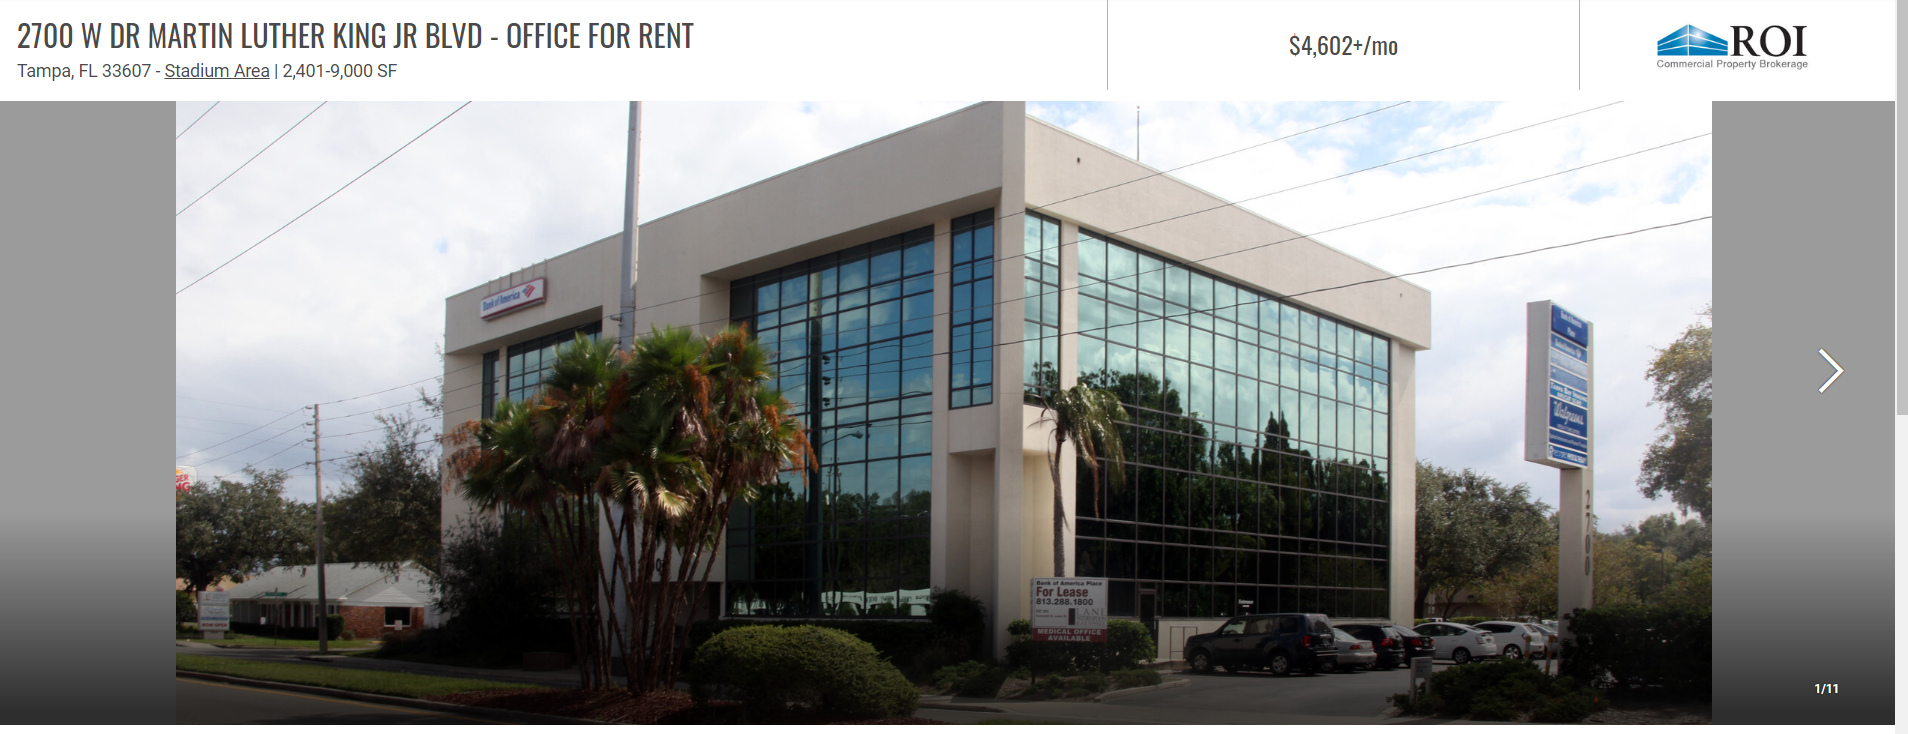

We will finally add Tampa Tommy's to the cluster map

In [43]:
obp_venues_final=obp_venues.append({'name':'Tampa Tommys' , 'categories':'American Restaurant' , 'lat':27.980660 , 'lng':-82.487180 , 'Cluster':5}, ignore_index=True)

In [44]:
obp_venues_final

,name,categories,lat,lng,Cluster
0,Happy Fish Seafood Restaurant,Spanish Restaurant,27.975567,-82.486323,1
1,Raymond James Stadium,Football Stadium,27.975832,-82.503355,4
2,Starbucks,Coffee Shop,27.981005,-82.488442,2
3,Al Lopez Park,Park,27.989207,-82.503020,3
4,Raymond James Stadium Luxury Suite,Football Stadium,27.976280,-82.503938,4
5,Panera Bread,Bakery,27.980857,-82.499157,2
6,West Tampa Sandwich Shop,Cuban Restaurant,27.973415,-82.485005,1
7,Montauro Restaurante,Italian Restaurant,27.974365,-82.486587,1
8,George M Steinbrenner Field,Baseball Stadium,27.979863,-82.507246,4
9,Bucs Pirate Ship,Football Stadium,27.974618,-82.503288,4


In [48]:
#Cluster Map with Tampa Tommy's needs to be generated

obp_lat=27.9813767
obp_long=-82.4948689

kclusters=5
map_clusters = folium.Map(location=[obp_lat, obp_long], zoom_start=14)

# set color scheme for the clusters
x=np.arange(kclusters)
ys=[i+x+(i*x)**2 for i in range(kclusters)]
colors_array=cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]

for lat, lng, label, cluster in zip(obp_venues_final['lat'], obp_venues_final['lng'], obp_venues_final['name'], obp_venues_final['Cluster']):
    label = folium.Popup('Cluster'+str(cluster), parse_html=True)
    folium.CircleMarker([lat, lng], radius=20, popup=label, color=rainbow[cluster-1], fill=True, fill_color=rainbow[cluster-1], fill_opacity=0.7, parse_html=False).add_to(map_clusters) 
    
map_clusters

## 4. Results

- We found 4 different clusters based on the list we retrieved from Foursquare API

- W DR MARTIN LUTHER KING JR BLVD was determined to be the best place to open up Tampa Tommy's due to the lack of restaurants currently open on this street, which is located near Raymond James Stadium

- There were not many options available for rent online, but we ended up going with a property located at 2700 W DR MARTIN LUTHER KING JR BLVD

- A final map with Tampa Tommy's (Cluster 5 in red) was generated

## 5. Discussion

### Transportation

Unfortunately, there were not any properties located near the stadium to rent, so once this business is up and running, we will have to provide a shuttle service from the tailgating lots to the restaurant. This will allow us to get rowdy fans into Tampa Tommy's to rake up the alcohol earnings for gamedays.

### Lack of Bars Near Raymond James Stadium

The biggest surprise to me while conducting this research was the lack of american bars in the area. Of the 30 results we got from Foursquare, only 1 returned in the category "American Restaurant." Fans not having a spot to go and watch the game after they are done tailgating strikes me as a major issue and an open opportunity for someone to make a good business decision.

### Alternate Strategy for Next Time

If I were to do this study again, I would most likely expand my search to a wider radius and see if different parts of the city are better suited for an establishment like this. We could expand the search to all of the city districts and not just around the stadium.

## 6. Conclusion

To conclude, the choice to start Tampa Tommy's at 2700 W DR MARTIN LUTHER KING JR BLVD came down to 3 things:

- Lack of restaurant options in the area
- Lack of available rental properties in the area
- Location was near the stadium

Let's Go Bucs!!!!!